In [272]:
import matplotlib.pyplot as plt
import numpy as np

In [273]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

In [274]:
import torch.nn as nn
import torch.nn.functional as F

In [275]:
import torch.optim as optim

In [276]:
from utils.FRDEEP import FRDEEPF

In [277]:
transform = transforms.Compose([transforms.RandomRotation(degrees=(90, -90))
,transforms.ToTensor(),transforms.Normalize([0.5],[0.5])])

In [278]:
trainset = FRDEEPF(root='./FIRST_data', train=True, download=True, transform=transform)  
batch_size_train = 2
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True, num_workers=2)

Files already downloaded and verified


In [279]:
testset = FRDEEPF(root='./FIRST_data', train=False, download=True, transform=transform) 
batch_size_test = 50
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=True, num_workers=2)

Files already downloaded and verified


In [280]:
classes = ('FRI', 'FRII')

In [281]:
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [282]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

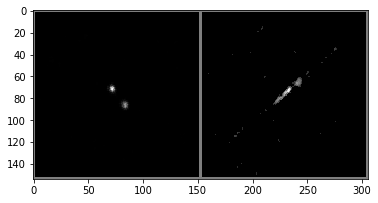

 FRII   FRI


In [283]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size_train)))

In [292]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()       
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(11,11),padding=5,stride=1)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=(5,5),padding=2,stride=1)
        self.conv3 = nn.Conv2d(in_channels=16,out_channels=24,kernel_size=(3,3),padding=1,stride=1)
        self.conv4 = nn.Conv2d(in_channels=24,out_channels=24,kernel_size=(3,3),padding=1,stride=1)
        self.conv5 = nn.Conv2d(in_channels=24,out_channels=16,kernel_size=(3,3),padding=1,stride=1)
        self.mpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.mpool2 = nn.MaxPool2d(kernel_size=3, stride=3)
        self.mpool3 = nn.MaxPool2d(kernel_size=5, stride=5)
        self.bnorm1 = nn.BatchNorm2d(6)
        self.bnorm2 = nn.BatchNorm2d(16)
        self.bnorm3 = nn.BatchNorm2d(24)
        self.bnorm4 = nn.BatchNorm2d(24)
        self.bnorm5 = nn.BatchNorm2d(16)
        self.flatten = nn.Flatten(1)
        self.fc1 = nn.Linear(400,256) #channel_size * width * height
        #self.fc1 = nn.Linear(16*7*7,256) #channel_size * width * height
        self.fc2 = nn.Linear(256,256)
        self.fc3 = nn.Linear(256,2)
        self.dropout = nn.Dropout()

    def forward(self, inputs):
        
        conv1  = F.relu(self.conv1(inputs))
        bnorm1 = self.bnorm1(conv1)
        mpool1 = self.mpool1(bnorm1)
        conv2  = F.relu(self.conv2(mpool1))
        bnorm2 = self.bnorm2(conv2)
        mpool2 = self.mpool2(bnorm2)
        conv3  = F.relu(self.conv3(mpool2))
        bnorm3 = self.bnorm3(conv3)
        conv4  = F.relu(self.conv4(bnorm3))
        bnorm4 = self.bnorm4(conv4)
        conv5  = F.relu(self.conv5(bnorm4))
        bnorm5 = self.bnorm5(conv5)
        mpool3 = self.mpool3(bnorm5)
        flatten = self.flatten(mpool3)
        #print(f?FLATTENED SHAPE: {flatten.shape}?)
        fc1     = F.relu(self.fc1(flatten))
        do      = self.dropout(fc1)
        fc2     = F.relu(self.fc2(do))
        do      = self.dropout(fc2)
        fc2     = F.relu(self.fc2(do))
        do      = self.dropout(fc2)
        fc3     = F.relu(self.fc3(do))
        return F.log_softmax(fc3,dim=1)


In [293]:
net = Net()

In [300]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=1)

In [301]:
nepoch = 1000  # number of epochs
print_num = 50
for epoch in range(nepoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % print_num == (print_num-1):    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / print_num))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 0.693
[1,   100] loss: 0.693
[1,   150] loss: 0.693
[1,   200] loss: 0.693
[1,   250] loss: 0.693


KeyboardInterrupt: 

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

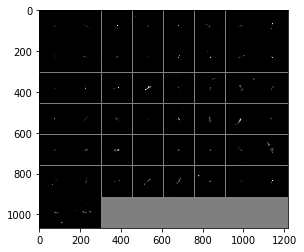

GroundTruth:    FRI   FRI  FRII   FRI  FRII   FRI   FRI  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII   FRI  FRII  FRII   FRI   FRI   FRI  FRII  FRII  FRII   FRI  FRII   FRI   FRI   FRI   FRI  FRII   FRI   FRI  FRII  FRII  FRII   FRI  FRII  FRII   FRI  FRII  FRII   FRI   FRI  FRII  FRII   FRI   FRI


In [98]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size_test)))

In [99]:
outputs = net(images)


/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [100]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(batch_size_test)))

Predicted:   FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII  FRII


In [101]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 50 test images: 56 %


/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [102]:
labels

tensor([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1])

In [111]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size_test):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1  

/usr/local/anaconda-python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [112]:
labels

tensor([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0])

In [113]:
predicted

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])

In [114]:
_

tensor([0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158,
        0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158,
        0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158,
        0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158,
        0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158, 0.6158,
        0.6158, 0.6158, 0.6158, 0.6158, 0.6158])

In [115]:
np.mean(_[predicted==0].cpu().detach().numpy()) #FRII Mean for _ 

nan

In [89]:
np.mean(_[predicted==1].cpu().detach().numpy()) #FRII mean for _››

5.9550824

In [90]:
_[predicted==0]

tensor([ 9.4073,  7.6119,  6.1900, 17.2167, 14.7824,  2.6301, 19.1471,  7.8273,
         6.3021, 13.2328,  9.4412, 14.6163, 11.9083,  7.8765,  8.8134, 10.0670,
         8.2570,  2.7648, 25.4607,  9.9192, 10.8991])

In [91]:
_[predicted==1]

tensor([ 9.9397,  6.9801,  7.2089,  7.8066,  5.5201,  8.6197,  3.5875,  4.8254,
         2.7649,  8.6885,  8.3659,  4.8806,  2.2292,  2.1991, 10.6960,  6.5618,
         6.1913,  5.4376,  2.7205,  9.7049,  6.1501,  2.0468, 11.6496,  1.6969,
         6.5659,  5.8841,  7.4166,  3.2962,  3.0629])

In [108]:
outputs

tensor([[0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3925, 0.6075],
        [0.3

In [43]:
np.sum(_.cpu().detach().numpy())

14.143635

In [56]:
for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of   FRI : 77 %
Accuracy of  FRII : 78 %
